In [4]:
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [5]:
passwords = pd.read_csv('password.csv', on_bad_lines='skip')

In [6]:
passwords.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [7]:
passwords['strength'] = passwords['strength'].astype('int16')
passwords['password'] = passwords['password'].astype(str)

In [8]:
passwords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669640 non-null  object
 1   strength  669640 non-null  int16 
dtypes: int16(1), object(1)
memory usage: 6.4+ MB


In [9]:
stren_dict = Counter(passwords['strength'])
keys = list(stren_dict.keys())
frequency = list(stren_dict.values())

Text(0, 0.5, 'Frequency')

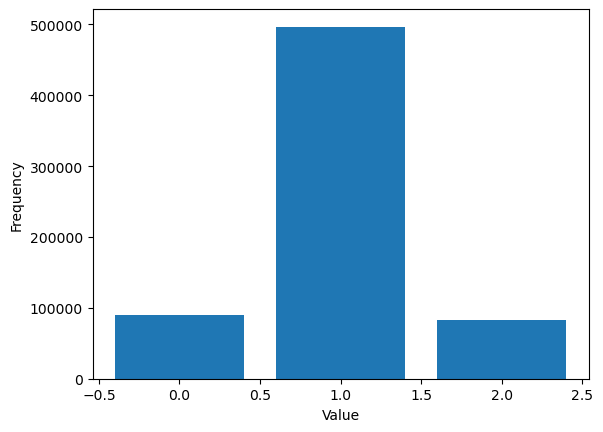

In [10]:
plt.bar(keys, frequency)
plt.xlabel('Value')
plt.ylabel('Frequency')

In [11]:
stren_0 = passwords.loc[passwords['strength'] == 0]

In [12]:
stren_1 = passwords.loc[passwords['strength'] == 1]

In [13]:
stren_2 = passwords.loc[passwords['strength'] == 2]

In [14]:
stren_1 = stren_1.sample(frac=0.20)

In [15]:
dfs = [stren_0, stren_1, stren_2]

In [16]:
new_data = pd.concat(dfs)

In [17]:
stren_dict = Counter(new_data['strength'])
keys = list(stren_dict.keys())
frequency = list(stren_dict.values())

Text(0, 0.5, 'Frequency')

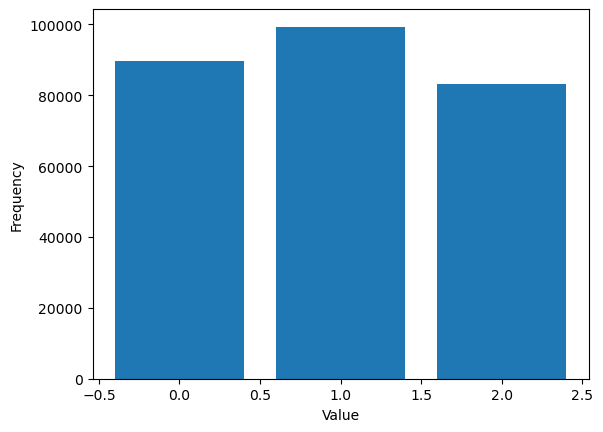

In [18]:
plt.bar(keys, frequency)
plt.xlabel('Value')
plt.ylabel('Frequency')

# This one looks better

In [19]:
pas = new_data['password'].to_numpy()

In [20]:
chars = string.ascii_letters + '0123456789!"#$%&()*+,-./:;<=>?@[\]^_`{|}~'

In [21]:
chars_l = [char for char in chars]

In [22]:
def cols_creator(char, passwords=pas):
    col = []
    for password in passwords:
        chars_count = Counter(password)
        col.append(chars_count.get(char))
    return col

In [23]:
for char in chars_l:
    new_data[char] = cols_creator(char)


In [24]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272199 entries, 21 to 669631
Data columns (total 95 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   password  272199 non-null  object 
 1   strength  272199 non-null  int16  
 2   a         110684 non-null  float64
 3   b         37691 non-null   float64
 4   c         48010 non-null   float64
 5   d         46304 non-null   float64
 6   e         86092 non-null   float64
 7   f         29498 non-null   float64
 8   g         52661 non-null   float64
 9   h         42310 non-null   float64
 10  i         79884 non-null   float64
 11  j         41792 non-null   float64
 12  k         51058 non-null   float64
 13  l         55998 non-null   float64
 14  m         55364 non-null   float64
 15  n         66540 non-null   float64
 16  o         77840 non-null   float64
 17  p         40029 non-null   float64
 18  q         22276 non-null   float64
 19  r         67715 non-null   float64
 20  s  

In [25]:
for col in new_data.columns:
    if np.dtype(new_data[col]) != 'O':
        if np.dtype(new_data[col]) == 'float64':
            new_data[col] = new_data[col].astype('float32')

In [26]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272199 entries, 21 to 669631
Data columns (total 95 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   password  272199 non-null  object 
 1   strength  272199 non-null  int16  
 2   a         110684 non-null  float32
 3   b         37691 non-null   float32
 4   c         48010 non-null   float32
 5   d         46304 non-null   float32
 6   e         86092 non-null   float32
 7   f         29498 non-null   float32
 8   g         52661 non-null   float32
 9   h         42310 non-null   float32
 10  i         79884 non-null   float32
 11  j         41792 non-null   float32
 12  k         51058 non-null   float32
 13  l         55998 non-null   float32
 14  m         55364 non-null   float32
 15  n         66540 non-null   float32
 16  o         77840 non-null   float32
 17  p         40029 non-null   float32
 18  q         22276 non-null   float32
 19  r         67715 non-null   float32
 20  s  

In [27]:
new_data = new_data.fillna(0)

In [28]:
new_data.to_csv('new_passwords.csv', index = False)